### *“There is no elevator to success, you have to take the stairs.”* 
*-Zig Ziglar, a salesman, author, and motivational Speaker* 

*But finally making it to that top stair feels awesome so keep going! -Dr.R*

----

YOUR NAME HERE: Daniel DeLuca

----

In [2]:
# Run this cell to set up the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Lab L: Histograms

In class, we began to discuss histograms. Histograms allow us to see the distribution of a quantitative continuous variable.  Sometimes, if a quantitiate discrete variable has lots of possible values, we might create a histogram for discrete data too.

In past examples, we used an example involving the top movies in a variety of years.  We also had access to their gross revenus, adjusted for the differences in years.  Let's read in that data now.

In [3]:
#Run this cell to read in the movie data and to clean it up a bit.
movies = pd.read_csv('top_movies.csv')
movies_gross = movies.rename(columns={'Gross (Adjusted)':'Adj_Gross'})
movies_gross["Adj_Gross"] = np.round(movies_gross.Adj_Gross/1000000, 2)
movies_gross

,Title,Studio,Gross,Adj_Gross,Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906.72,2015
1,Avatar,Fox,760507625,846.12,2009
2,Titanic,Paramount,658672302,1178.63,1997
3,Jurassic World,Universal,652270625,687.73,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668.87,2012
...,...,...,...,...,...
195,The Caine Mutiny,Columbia,21750000,386.17,1954
196,The Bells of St. Mary's,RKO,21333333,545.88,1945
197,Duel in the Sun,Selz.,20408163,443.88,1946
198,Sergeant York,Warner Bros.,16361885,418.67,1941


Run the following cell to find the mean adjusted gross.

In [4]:
avg_movie_gross = movies_gross["Adj_Gross"].mean()
avg_movie_gross 

504.19799999999987

On average, we see that the top movie (in terms of gross) makes about 504 million dollars.  This average doesn't tell us everything about the gross of movies though.  We often rely on *histograms* to show us the full picture, ie, the full distribution of the data.  

Below we generate the histogram for the adjusted gross of the top movies. Also, we use ``scatter`` to show the mean of the data on the histogram.

Text(0.5, 1.0, 'Adjusted Gross of Top Movies')

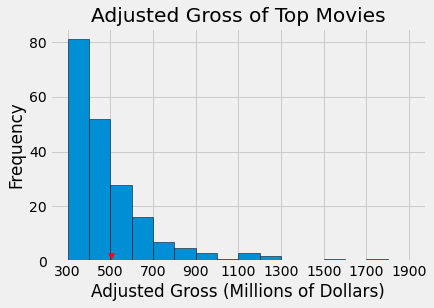

In [5]:
plt.hist(movies_gross['Adj_Gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xticks(np.arange(300,2000, 200))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')

So yes, the mean might be about 500 million dollars, but thanks to this histogram, we see that the adjusted gross of these top movies could range from 300 to about 1800, with a high emphasis on 300-700 million dollars and a long tail of less likely adjusted gross values falling to the right.  In summary, we learn so much more from this histogram that we did from just knowing the mean.

We use the term *bins* to discuss the categories/ranges created by each bar in the histogram. So the first bin is 300-400 million dollars, followed by 400-500, 500-600, etc.  By default, if a data point falls at a tick exactly between two bins, that data point is included in the count of the lower bin. So for example, if a movie were to gross exactly 500 million dollars, it would be included in the 400-500 bin but not the 500-600 bin.

Even though the mean adjusted gross is about 504  million dollars, we have a much better understanding of the data thanks to the histogram above.  We see that most frequent bin is 300-400 million and that most of the top movies have a range of 300-700 million dollars.

Also, we see that there are high grossing outliers that pull up the mean.  Due to the long tail to the right, we call this a *right-skewed* or *postive-skewed* distribution.   If the tail were to the left, it would be a **left skewed** distribution. 

It is important to note that in a right skewed distribution, the mean appears to the right of the median, which we can see by running the code cell below.  

In [6]:
movies_gross['Adj_Gross'].describe()

count     200.00000
mean      504.19800
std       215.98167
min       322.26000
25%       367.77750
50%       438.86000
75%       551.21000
max      1757.79000
Name: Adj_Gross, dtype: float64

The median cuts the data in half. Since the median is ~439 million, 50% of movies have an adjusted gross value of leses than thsi value, and 50% also fall above it.  However, the mean is larger/to the right of the median.  Again, this means that the outliers force the mean to move right from the median.

Let's understand the code that gave us the histogram above.  

First, we used the ``hist`` function on matplotlib and we just had to pass in ONE column, namely ```Adj_Gross```.  The histogram function counted/tallied how many movies existed in each bin for us.  Here are the paremeters that were used.  

* ```movies_gross['Adj_Gross']```: We must provide the hist function with the name of the column to use to create the histogram.

* ```edgecolor = 'black'```: We ask Python to please outline each bar with a black edge

* ```bins = np.arange(300,2000, 100)```:  Here we tell Python what our bins should be by specifying this list:  300, 400, 500, ...., 1900.  If we do not provide this detail, Python will generate bins starting at the min of the data and going to the max of the data.  **It is best practice to define the bins on your own** so that it is easy for the ready to determine the bin categories.  Usally, I run the describe function and check out the min/max to help me define what my bins should be.

We also included the line of code below.  This code allowed us to label each tick at every other bin category. 
* ```plt.xticks(np.arange(300,2000, 200))```

Below is the same code without the ``xticks``.  **Notice that the x axis labels don't line up with the bins.** For example, 750 is listed in the middle of some bin.  This means it's hard to tell what the bins are. It is better to help the reader by aligning the labels with the bins, so use ``xticks`` whenever you create a histogram.

Text(0.5, 1.0, 'Adjusted Gross of Top Movies')

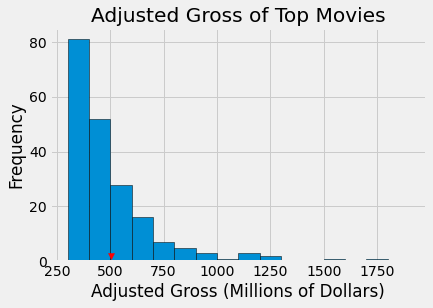

In [7]:
plt.hist(movies_gross['Adj_Gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')

---

## **Question 1**

Redraw the histogram below but label every 3rd tickmark:  300, 600, 900, ...

Text(0.5, 1.0, 'Adjusted Gross of Top Movies')

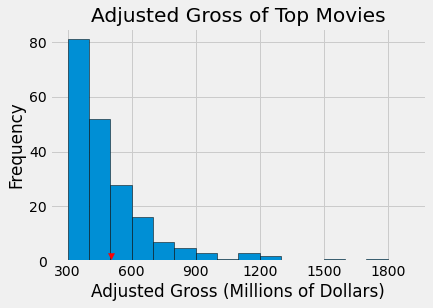

In [11]:
plt.hist(movies_gross['Adj_Gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xticks(np.arange(300,2000,300))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')

---

## **Question 2**

Looking at the original histogram and eyeballing, how many top movies had a gross of more than \$900 million?  (Answer the question by showing me exactly what numbers you are adding for each category.  So show me the arithmetic.)

In [12]:
num_movies_more_than_900 = 3+1+3+2+1+1
num_movies_more_than_900

11

---

## **Question 3**

Answer the same question with code.  *Hint:* Use boolean indexing.

In [15]:
num_movies_more_than_900 =   movies_gross[movies_gross['Adj_Gross'] > 900].count()
num_movies_more_than_900

Title        11
Studio       11
Gross        11
Adj_Gross    11
Year         11
dtype: int64

---

# Using the outputs of ``plt.hist``

Instead of eyeleballing or boolean indexing, we can actually use the output returned by the ``plt.hist`` function.

Run the following code cell and check out all the text printed at the top.   The ``plt.hist`` function is trying to tell you lots of good info.  It is returning to you 2 arrays:  One telling you the counts of all the bins and the second telling you the left endpoints/begginging of each bin.

(array([81., 52., 28., 16.,  7.,  5.,  3.,  1.,  3.,  2.,  0.,  0.,  1.,
         0.,  1.,  0.]),
 array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300,
        1400, 1500, 1600, 1700, 1800, 1900]),
 <BarContainer object of 16 artists>)

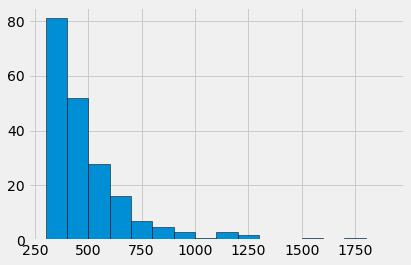

In [16]:
plt.hist(movies_gross['Adj_Gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)

So the ``plt.hist`` tells you that:

* The counts in each bin are: 81, 52, 28, 16,  7,  5,  3,  1,  3,  2,  0,  0,  1, 0,  1, 0
* The starting point of each bin is: 300,  400,  500,  600,  700,  800,  900, ..., 1400, 1500, 1600, 1700, 1800, 1900

This means that each of the above arrays have the same length.  

So we could have answered the previous questions without eyeballing or using boolean indexing!  

We see that 900 was the start of the 7th number in the list, so we could have added up all counts from the 7th number in the list on:

In [ ]:
3 +  1 + 3 +  2 + 0 + 0 + 1 + 0 + 1 + 0

Since the ``plt.hist`` function is usually your first line, you might have to store the output of the plt.hist function and print it later to see these arrays of bins/counts.  Check out how I did this below by using ``bin_info``.

(array([81., 52., 28., 16.,  7.,  5.,  3.,  1.,  3.,  2.,  0.,  0.,  1.,
         0.,  1.,  0.]),
 array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300,
        1400, 1500, 1600, 1700, 1800, 1900]),
 <BarContainer object of 16 artists>)

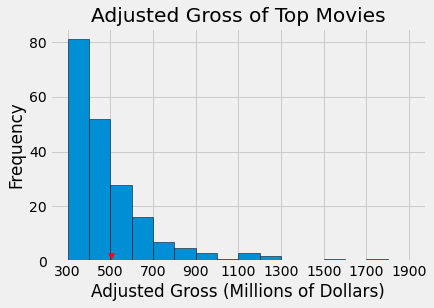

In [17]:
#bin_info will capture the output and show it to you later, if you need it.

bin_info = plt.hist(movies_gross['Adj_Gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), zorder=1)
plt.scatter(avg_movie_gross,2, color = 'red', marker="v", zorder=2)
plt.xticks(np.arange(300,2000, 200))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Frequency')
plt.title('Adjusted Gross of Top Movies')
bin_info

---

## **Question 4**

Look at the output and answer:  Exactly how many movies had a gross of 500-700?

In [19]:
28+16+7

51

---

# Showing percentages instead of counts

We often want to show percentages not counts on the y-axis.  We can ``trick`` Python into doing this.  

To show percentages, first just weight every data point not by 1 but by $1/n$ where $n$ is the total number of data points.  We will use the ```np.ones``` function to help us.

In [20]:
#Run this cell to see that np.ones(5) creates 5 ones.
np.ones(5)

array([1., 1., 1., 1., 1.])

In [21]:
#Run this cell to see that np.ones(12) creates 12 ones.
np.ones(12)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

To weight every data point (here adjusted gross for a movie) appropriately, we create a ``multipliers`` array that contains $n$ values of $1/n$.

In [ ]:
#Run this cell to generate the 
n = len(movies_gross)
multipliers = np.ones(n)*100/n  #Divide each of our 1's by n and multiply by 100 so we can look at this on a 0-100 percent scale.
multipliers

No just pass this multipliers array in as weights to the ``hist`` function via the ``weights`` parameter and change the y-axis label to ```"Percentage"```.

Text(0.5, 1.0, 'Adjusted Gross of Top Movies')

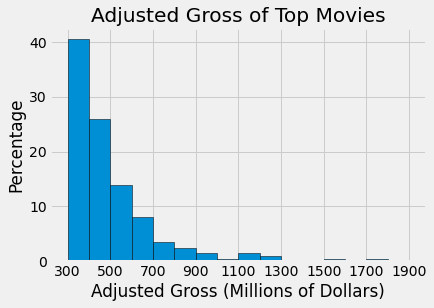

In [23]:
#Here we tracking python into plotting percents, not counts by using the multipliers array as weights.
plt.hist(movies_gross['Adj_Gross'], edgecolor = 'black', bins = np.arange(300,2000, 100), weights = multipliers)
plt.xticks(np.arange(300,2000, 200))
plt.xlabel('Adjusted Gross (Millions of Dollars)')
plt.ylabel('Percentage')
plt.title('Adjusted Gross of Top Movies')

Walah!  We have percentages on the y-axis.

---

## Question 5

Let's load in some more data. The ``crime_2017.csv`` file contains the number of crimes committed in the United States by using different weapons.  Read over the column titles to familiarize yourself with the variables.

In [ ]:
crimes = pd.read_csv("crime_2017.csv")
crimes

**A)**  We're going to make a histogram showing the distribution of the total murders per state in 2017.  To prep for this, use ``describe`` to see what the max and min of the variable is.



In [ ]:
crimes['Total Murders'].describe()

**B)**  Based on the above data, using bins from 0-2000 that go up by 100 seems appropriate.

Make a histogram for the number of murders per state in the US.  

Make it look like this one below, exactly.

**Notice percents and not counts are shown.**

![HistCrimes](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/Murder2017.png)

In [31]:
#Here do the work to set up the multipliers array
m = len(crimes)
multipliers_2 = np.ones(m)*100/m


Text(0.5, 1.0, 'Total Murders In Each State (2017)')

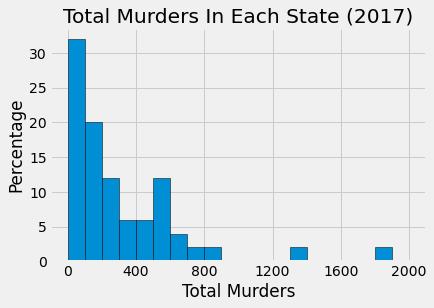

In [66]:
#Here create the histogram
plt.hist(crimes['Total Murders'], edgecolor = 'black' , bins = np.arange(0,2001,100) , weights = multipliers_2)
plt.xticks(np.arange(0,2001,400))
plt.xlabel('Total Murders')
plt.ylabel('Percentage')
plt.title('Total Murders In Each State (2017)')

Clearly the total murders distribution is skewed RIGHT again, which we can see dur to the long tail extending to the right.  Also, from the ``describe`` function we see that the mean number of murders is 302.56 and the median is 178. This means the outlier states bring the mean up from the median.  Since the mean is to the right of the median, it is skewed right.



**C)**  Rerun your above histogram saving the output of ``plt.hist`` into a bin_info variable.  Then run the cell below.  Based on this, answer:  Exactly what percentaeg of states had between 500 and 600 total murders in 2017?  Write your answer in the cell provided below.

(array([32., 20., 12.,  6.,  6., 12.,  4.,  2.,  2.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  2.,  0.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]),
 <BarContainer object of 20 artists>)

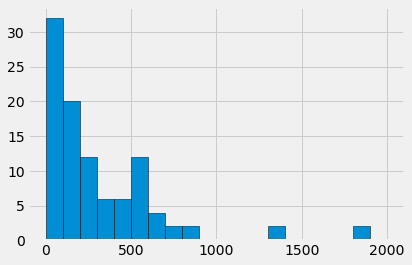

In [68]:
bin_info = plt.hist(crimes['Total Murders'], edgecolor = 'black' , bins = np.arange(0,2001,100) , weights = multipliers_2)
bin_info

16

## Question 6

**A)** Create a histogram of the state populations, in millions.  Get this histogram exactly.

![StatePopulations](https://raw.githubusercontent.com/kathleen-ryan-DeSales/CS250/main/pictures/PopStates2021.PNG)



In [ ]:
q = len(crimes)
multiplier_3 = np.ones(q) *100/q
multiplier_3


Text(0.5, 1.0, 'Population of States (2021)')

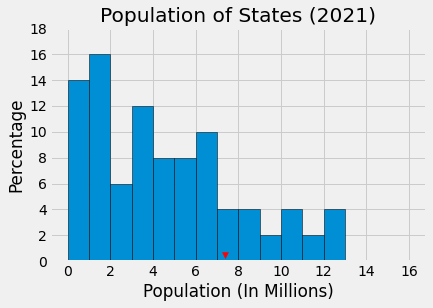

In [88]:
plt.hist(crimes['Pop 2021']/1000000, edgecolor = 'black' , bins = np.arange(0,17,1), weights = multiplier_3)
plt.scatter(7376142.25/1000000, .5, color = 'red', zorder =2, marker = 'v')
plt.xticks(np.arange(0,17,2))
plt.yticks(np.arange(0,19,2))
plt.xlabel('Population (In Millions)')
plt.ylabel('Percentage')
plt.title('Population of States (2021)')

**B)** Using ``describe``, I found that the 75th percentile winds up being ``7376142.25`` million.  I plotted the 7th pecentile on the histogram via this line of code.  Go ahead and add it to your above histogram code and hit run.

``plt.scatter(7376142.25/1000000, .5, color = 'red', zorder =2, marker = 'v')``


---

# Comparing Two Histograms on the Same Plot.

We can compare the distribution of 2 histograms on the same plot.   

It is reasonable that the more populated states have more murders.  Let's compare the distributions of murders ih highly populated states with less populated states.  

We'll consider a highly populated state to be one in the top quartile, ie, above the 75th percentile, so all states with a population of more than 7.4 millon.

Let's divide our data into highly populated and less populated countries.


In [90]:
percentile_75 = 7376142.25
most_populated = crimes[crimes["Pop 2021"] >= percentile_75]
less_populated = crimes[crimes["Pop 2021"] < percentile_75]

Now let's plot 2 histograms on one.  First we plot the distribution of the total murders for the highly populated states and then we do the same for the low populated states.

So in the cell below, we have to 2 ``plt.hist`` calls.

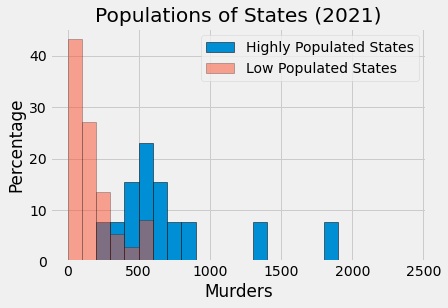

In [91]:
#Plot most pop states
n = len(most_populated)
multipliers_most_pop = np.ones(n)*100/n 

bin_info_most_pop = plt.hist(most_populated["Total Murders"], 
                             edgecolor = 'black', 
                             bins = np.arange(0,2500,100), weights = multipliers_most_pop)
#Plot less pop states
n = len(less_populated)
multipliers_less_pop = np.ones(n)*100/n 

bin_info_less_pop = plt.hist(less_populated["Total Murders"], 
                             edgecolor = 'black', 
                             bins = np.arange(0,2500,100), weights = multipliers_less_pop, alpha = 0.5)

plt.legend(["Highly Populated States", "Low Populated States"])
plt.xlabel('Murders')
plt.ylabel('Percentage')
plt.title('Populations of States (2021)');

Does it appear that less populated states have less murders?  It sure does!


**Also, notice:**

* **One distribution is see through/transparent which was done by adding the ``alpha = 0.5 `` parameter to the second histogram. THis parameter helps you change the transparency and it can be on a scale of 0-1.**

* **Because the counts for the two groups could be very different, you have to plot percentages (nto counts) when placing two histograms on one.**

---

## Question 7

**A)** Below, create a histogram that shows the distribution of handguns across all states versus the distribution of Knives or Cutting instruments.  Be sure to set add all important elements as discussed in this lab.

In [100]:
w = len(crimes)
multiplier_4 = np.ones(w)*100/w

(array([92.,  4.,  2.,  0.]),
 array([  0, 100, 200, 300, 400]),
 <BarContainer object of 4 artists>)

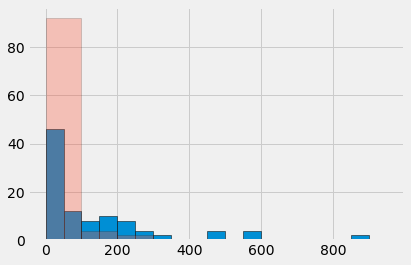

In [112]:
plt.hist(crimes['Handguns'], edgecolor = 'black' , bins = np.arange(0,1000,50) , weights = multiplier_4)
plt.hist(crimes['Knives or Cutting instruments'], edgecolor = 'black' , bins = np.arange(0,500,100) , weights = multiplier_4 , alpha = .3)

In [99]:
crimes['Handguns'].describe()

count     50.000000
mean     140.640000
std      185.384516
min        0.000000
25%       17.000000
50%       81.500000
75%      184.500000
max      886.000000
Name: Handguns, dtype: float64

In [97]:
crimes['Knives or Cutting instruments'].describe()

count     49.000000
mean      32.469388
std       43.200647
min        1.000000
25%        9.000000
50%       20.000000
75%       42.000000
max      258.000000
Name: Knives or Cutting instruments, dtype: float64

**B)** Do the distributions appear similar or different? Discuss?

The distributions seem different because there are significantly more handgun murders then there are with a cutting instrument 

---

Done!  Submit!